# Figures 10 and 11
# Optimising Sub-pattern Recognition: Memory Capacity

Notebook to plot figures 10 and 11 from [1] *Section 9.1: Optimising Sub-pattern Recognition*.

To examine the effect of the sub-pattern recognition optimisations on ESAM network memory capacity, the following experiment was used:

<table>
<tr><td>

| Problem A    |          |
| :----------- | :------  | 
| $f$          | 900      | 
| $m$          | 0 - 25,000 | 
| $s_m$        | 0.22     | 
| $s_n$        | 0        | 
| | | 
| | | 
| | | 
| | |
| | |
| | |
| | |
|||
|||
|||
</td><td>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
</td><td>

| Network A (Baseline) |          |
| :--------------------| :------  | 
| $h$                  | 2        | 
| $\theta$             | 12       | 
| $s^+_{h\_f}$         | 0.1      | 
| $\sigma_{h\_pre+}$   | `FixedProbability` | 
| $s^+_{f\_h}$         | 1     | 
| $s^-_{f\_h}$         | 1     | 
| $\sigma_{f\_pre-}$, $\sigma_{f\_pre-}$  |  `FixedProbability`       | 
| $e$                  | 3        | 

</td></tr> </table>



The accuracy of four different networks are compared in the graphs as the number of memories $m$ varies:

* Network A - the baseline network from [1] (as described above).
* Network A with $\theta$ optimised for each test as described in [1].
* Network A with connections optimised as described in [1].
* Network A with $\theta$ optimised for each test and the connections optimised as described in [1].

Results from the initial paper [2] are also plotted in Figure 10. This is to validate that they are the same as the baseline from Network A.

#### References
[1] Warr, K., Hare, J., Thomas, D. (2024) Improving Recall Accuracy in Sparse Associative Memories that use Neurogenesis

[2] Hoffmann, H. (2019). Sparse Associative Memory. *Neural Computation*

In [13]:
from pathlib import Path  
import os
import sys
sys.path.append('../src')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from simulation_scripts.test_suite_results import TestSuiteResults
from utils.excel_handler import ExcelHandler

plt.tight_layout()
sns.set_theme(style="whitegrid")

<Figure size 640x480 with 0 Axes>

## Set up the test suite details

Specify where the test data will be gotten from.

In [14]:
test_name = 'experiment_A_sub_pattern'
data_base_dir = 'output'
data_sheet = 'latest_data'
test_suite_type='vary_problem'
base_dir = data_base_dir+os.sep+test_name
tests = {'original': 'Network A (baseline)',
         'opt_thresh': 'Network A - threshold optimised',
         'opt_conns': 'Network A - connections optimised',
         'opt_thresh_conns': 'Network A - threshold + connections optimised'}

## Figure 10: Single plot comparing accuracies

Generate a single plot to compare the accuracies across the various networks. 
Plot accuracies on the same plot


### Get the relevant data


In [15]:

tests_with_hoff = tests.copy()
tests_with_hoff['hoffman_paper']='Network A (baseline results from Hoffman paper)'

all_tests = pd.DataFrame()
hue_order = []

print('Using the following pre-generated data:\n')
print('  File                                                            Data Sheet')
print('  ---------------------------------------------------------------------------')
for test_file, test_name in tests_with_hoff.items():
    excel_file = base_dir + os.sep + test_file + '.xlsx'
    print('  {:60s}    {:10s}'.format(excel_file, data_sheet))
    reader = ExcelHandler(base_dir, test_file)
    test_df = reader.read_sheet(data_sheet)
    test_name_np = np.repeat([test_name], repeats=test_df.shape[0], axis=0)
    test_df['test'] = test_name_np
    hue_order.append(test_name)
    all_tests = pd.concat([all_tests, test_df])

# Filter on the final epoch - acquired from the static description of one of the tests
reader = ExcelHandler(base_dir, 'original')
network_static = reader.read_sheet(sheet_name='network_params_static').iloc[0]
plot_data = all_tests.copy().loc[all_tests['epoch'] == network_static['e']]


Using the following pre-generated data:

  File                                                            Data Sheet
  ---------------------------------------------------------------------------
  output/experiment_A_sub_pattern/original.xlsx                   latest_data
  output/experiment_A_sub_pattern/opt_thresh.xlsx                 latest_data
  output/experiment_A_sub_pattern/opt_conns.xlsx                  latest_data
  output/experiment_A_sub_pattern/opt_thresh_conns.xlsx           latest_data
  output/experiment_A_sub_pattern/hoffman_paper.xlsx              latest_data


### Draw the plot

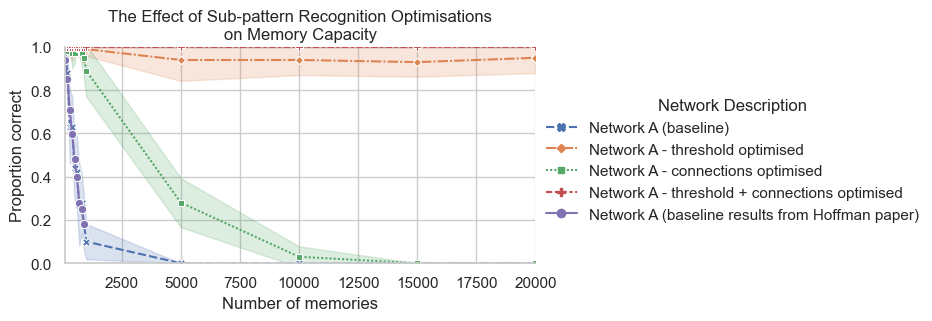

In [20]:
line_key_name = 'Network Description'
plot_data[line_key_name] = plot_data['test'].astype('category')
title = 'The Effect of Sub-pattern Recognition Optimisations\non Memory Capacity'

x_col = 'data_param_m'
y_col = 'prop_correct'

sns.relplot(data=plot_data,
            x=x_col,
            y=y_col,
            style=line_key_name,
            kind='line',
            markers=True,
            height=3,
            aspect=2.0,
            hue=line_key_name,
            hue_order=hue_order,
            errorbar='sd',
            )

plt.xlim(plot_data[x_col].min(), plot_data[x_col].max())
plt.ylim(0, 1)
plt.xlabel('Number of memories')
plt.ylabel('Proportion correct')
plt.title('The Effect of Sub-pattern Recognition Optimisations\non Memory Capacity')

#plt.show()
plt.savefig('..'+os.sep+'figures'+os.sep+'figure10.png', dpi=400, bbox_inches='tight')


## Figure 11: Validation against theoretical calculations


In [17]:
test_results = TestSuiteResults(test_dir=base_dir, 
                       test_suite_type=test_suite_type,
                       test_name_mapping = tests,
                       test_data_sheet=data_sheet,
                       )
all_tests_plot_data= test_results.get_theory_empirical_probs()

tests are :  ['Network A (baseline)', 'Network A - threshold optimised', 'Network A - connections optimised', 'Network A - threshold + connections optimised']
test dir:  output/experiment_A_sub_pattern

TestSuitePlotter successfully initialised for tests ['Network A (baseline)', 'Network A - threshold optimised', 'Network A - connections optimised', 'Network A - threshold + connections optimised']
Reading theoretical probabilities for test original from file.
Reading theoretical probabilities for test opt_thresh from file.
Reading theoretical probabilities for test opt_conns from file.
Reading theoretical probabilities for test opt_thresh_conns from file.


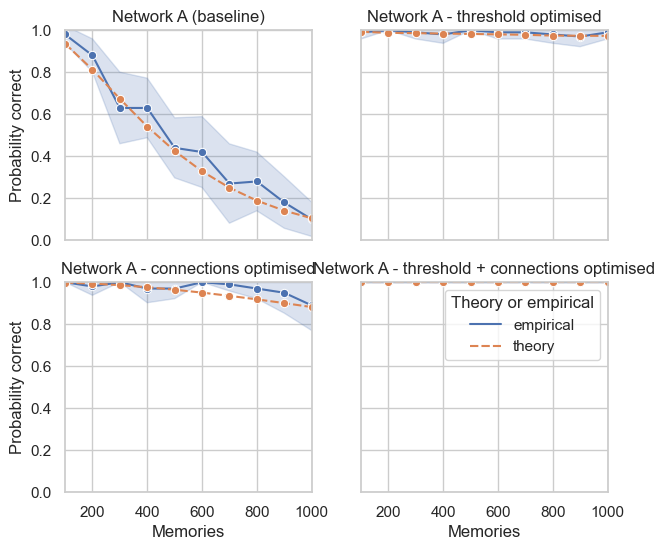

In [18]:
fig, axes = plt.subplots(2,2, figsize = (7, 6))

x_min=100
x_max=1000
y_min=0
y_max=1

for plot_num, test_df in zip(range(len(all_tests_plot_data)), all_tests_plot_data):
    name_of_test = test_df['test_name'].iloc[0]
   
    ax = plt.subplot(2,2,plot_num+1)
    
    legend=False
    if plot_num == 3:
        legend = True
    
    sns.lineplot(data=test_df,
                 x=x_col,
                 y='prob_correct',
                 style='Theory or empirical',
                 marker='o',
                 hue='Theory or empirical',
                 errorbar='sd',
                 ax=ax,
                 legend=legend
                 )

    ax.set_xlim([x_min, x_max])
    ax.set_ylim([y_min, y_max])
    ax.set_title(name_of_test)
    
    # Print the x axis for plots 2 and 3
    if plot_num >= 2:
        ax.set_xlabel('Memories')
    else:
        ax.get_xaxis().set_ticklabels([])
        ax.set_xlabel(None)
    # Print the y axis for plots 0 and 2
    if (plot_num==0) or (plot_num == 2):
        ax.set_ylabel('Probability correct')
    else:
        ax.get_yaxis().set_ticklabels([])
        ax.set_ylabel(None)
            
plt.show()     